In [34]:
from os.path import join

import einops
import numpy as np
from scipy import signal
import torch

from datasets.dreamer import DREAMERDataset
import matplotlib.pyplot as plt

In [17]:
from os import listdir

# print(listdir(join("..", "..", "datasets", "eeg_emotion_recognition", "dreamer")))
dataset = DREAMERDataset(path=join("..", "..", "datasets", "eeg_emotion_recognition", "dreamer"),
                         split_in_windows=True,
                         window_size=1, drop_last=True,
                         discretize_labels=True, normalize_eegs=True,
                         validation="k_fold", k_folds=10,
                         labels_to_use=["valence", "arousal", "dominance"],
                         batch_size=128)

torch.Size([128, 14])


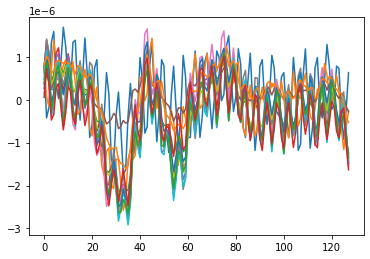

In [18]:
sample_eeg = dataset[0][0]
print(sample_eeg.shape)
plt.plot(sample_eeg)
plt.show()

In [45]:
def wavelet_decompose(x, widths):
    assert any([isinstance(widths, t) for t in {np.ndarray, torch.Tensor, list}])
    assert all([width > 0 for width in widths])
    x_decomposed = torch.stack([torch.as_tensor(signal.cwt(x[:, i_channel], signal.ricker, widths))
                                     for i_channel in range(x.shape[-1])], dim=-1) # (w, s, e)
    return x_decomposed

s=wavelet_decompose(x=sample_eeg, widths=[1, 2, 4, 8, 16, 32])
print(s.shape)

torch.Size([6, 128, 14])


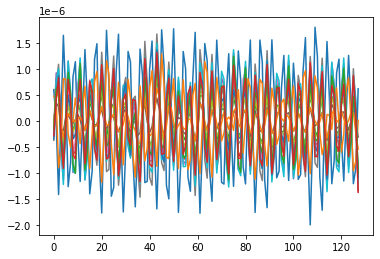

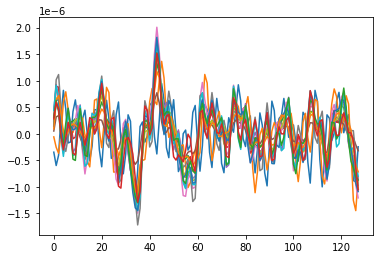

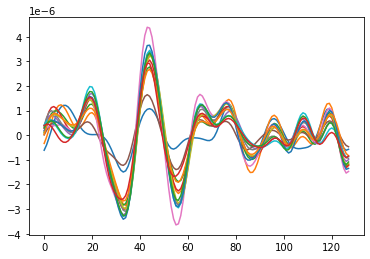

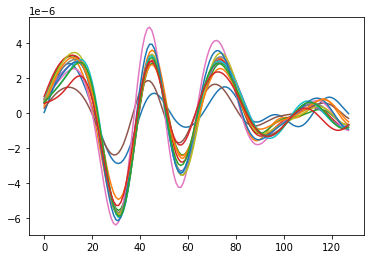

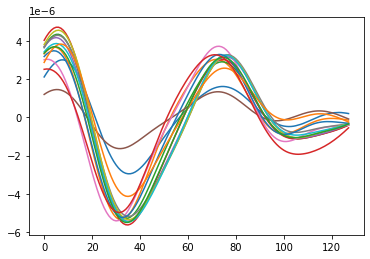

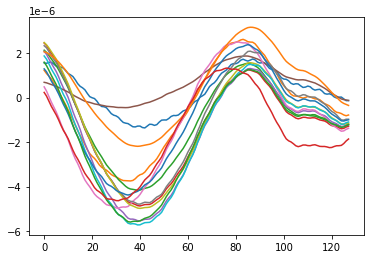

In [46]:
for i in s:
    plt.plot(i)
    plt.show()